## Importing Libraries & taking a glance at dataset

In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [142]:
df = pd.read_csv("DataPOO.csv")
df.head(10)

,location,bhk,total_sqft,bath,price
0,Marrakech,4,1972,3.0,1055558
1,Marrakech,1,1206,1.0,840577
2,Marrakech,6,2667,3.0,1136329
3,Marrakech,4,1761,2.0,689436
4,Marrakech,3,2098,3.0,1074897
5,Marrakech,1,892,1.0,434379
6,Marrakech,3,1739,3.0,883951
7,Marrakech,4,2367,2.0,979171
8,Marrakech,3,2043,3.0,952347
9,Marrakech,3,1736,3.0,694677


In [143]:
df.shape

(6990, 5)

## Checking suitability of `area_type` column

In [144]:
df.groupby('location')['location'].agg('count')

location
Agadir         507
Azilal          22
Azrou          191
Beni Mellal    284
Berrched       392
Bjaad           40
Casablanca     460
Dakhla         164
EL Jadida      188
Essaouira      336
Essmara         74
Fes            224
Gulmim         100
Ifran          200
Kentitra       400
Khounifra      220
Khouribga      164
Laayoun        116
Lhajb           27
Marrakech      396
Martil           4
Meknes         164
Midelt           2
Mohammadia     502
Nador          112
Oujda          244
Ourzazat       128
Safi           200
Settat         324
Sidi ifni       40
Skhirat          2
Tanger         400
Tata            44
Taza            96
Tetouan        184
Tiznit           3
Zagoura         36
Name: location, dtype: int64

## show database

In [145]:
df

,location,bhk,total_sqft,bath,price
0,Marrakech,4,1972,3.0,1055558
1,Marrakech,1,1206,1.0,840577
2,Marrakech,6,2667,3.0,1136329
3,Marrakech,4,1761,2.0,689436
4,Marrakech,3,2098,3.0,1074897
...,...,...,...,...,...
6985,Martil,5,2869,4.0,1183232
6986,Skhirat,5,3436,3.0,1849113
6987,Skhirat,5,2571,3.0,1238178
6988,Midelt,4,2009,2.0,1099323


## Checking for null values

In [146]:
df.isnull().sum()

location      0
bhk           0
total_sqft    0
bath          6
price         0
dtype: int64

## Dropping `na` rows

In [147]:
df2 = df.dropna()
df2.isnull().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

## Lambda function for BHK categorization

In [148]:
df2['bhk'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [149]:
df2['bhk'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [150]:
df2[df2.bhk>5]

,location,bhk,total_sqft,bath,price
2,Marrakech,6,2667,3.0,1136329
10,Marrakech,6,3168,3.0,1758740
13,Marrakech,6,3089,3.0,1540970
16,Marrakech,6,2564,3.0,1243571
20,Marrakech,6,2573,4.0,1443454
...,...,...,...,...,...
6952,Berrched,6,3463,3.0,1574089
6953,Berrched,6,3028,4.0,1622389
6962,Berrched,6,2931,3.0,1102150
6969,Berrched,6,2757,4.0,1304253


## Converting dtype of `total_sqft` column to float

In [151]:
df2.total_sqft.unique()

array([1972, 1206, 2667, ..., 3028, 3368, 3113], dtype=int64)

In [152]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [153]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,bhk,total_sqft,bath,price


## Adding a `price_per_sqft` column

In [154]:
df4 = df2.copy()
df4['price_per_sqft'] = df4['price']/df4['total_sqft']
df4.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Marrakech,4,1972,3.0,1055558,535.272819
1,Marrakech,1,1206,1.0,840577,696.995854
2,Marrakech,6,2667,3.0,1136329,426.070116
3,Marrakech,4,1761,2.0,689436,391.502555
4,Marrakech,3,2098,3.0,1074897,512.343661


## Dimnsionality reduction of `location` column

In [155]:
df4.location = df4.location.apply(lambda x:x.strip()) #REMOVING SPACES
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [156]:
location_stats

location
Agadir         506
Mohammadia     502
Casablanca     457
Kentitra       400
Tanger         400
Marrakech      396
Berrched       392
Essaouira      336
Settat         324
Beni Mellal    283
Oujda          244
Fes            224
Khounifra      220
Ifran          200
Safi           200
Azrou          191
EL Jadida      188
Tetouan        183
Dakhla         164
Meknes         164
Khouribga      164
Ourzazat       128
Laayoun        116
Nador          112
Gulmim         100
Taza            96
Essmara         74
Tata            44
Bjaad           40
Sidi ifni       40
Zagoura         36
Lhajb           27
Azilal          22
Martil           4
Tiznit           3
Skhirat          2
Midelt           2
Name: location, dtype: int64

In [157]:
len(location_stats[location_stats<=10]) #how many location has less than 10 data point

4

In [158]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Martil     4
Tiznit     3
Skhirat    2
Midelt     2
Name: location, dtype: int64

In [159]:
df4.location = df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

34

## Removing abnormal rows with in comparison to `total_sqft` with `bhk`

In [160]:
# total_sqft / bhk = 600/5 = 120 thta's abnormale, so we'll remove this raws
df4[df4.total_sqft/df4.bhk<350]

,location,bhk,total_sqft,bath,price,price_per_sqft
114,Tanger,4,1398,1.0,911399,651.930615
224,Kentitra,4,1315,1.0,770713,586.093536
390,Safi,4,1363,2.0,824810,605.143067
424,Berrched,4,1389,1.0,903801,650.684665
473,Casablanca,4,1328,1.0,691444,520.665663
...,...,...,...,...,...,...
6794,Khouribga,4,1359,2.0,683568,502.993377
6828,Khounifra,4,1352,2.0,809546,598.776627
6858,Bjaad,4,1329,2.0,863817,649.975169
6868,Settat,4,1313,2.0,742670,565.628332


In [161]:
df4.shape

(6984, 6)

In [162]:
df5 = df4[~(df4.total_sqft/df4.bhk<350)]
df5.shape

(6883, 6)

In [163]:
df5.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Marrakech,4,1972,3.0,1055558,535.272819
1,Marrakech,1,1206,1.0,840577,696.995854
2,Marrakech,6,2667,3.0,1136329,426.070116
3,Marrakech,4,1761,2.0,689436,391.502555
4,Marrakech,3,2098,3.0,1074897,512.343661
5,Marrakech,1,892,1.0,434379,486.971973
6,Marrakech,3,1739,3.0,883951,508.309948
7,Marrakech,4,2367,2.0,979171,413.675961
8,Marrakech,3,2043,3.0,952347,466.151248
9,Marrakech,3,1736,3.0,694677,400.159562


## Removing `price_per_sqft` outlier values

In [164]:
df5.price_per_sqft.describe()

count    6883.000000
mean      528.509959
std        89.652144
min       370.884721
25%       464.672902
50%       511.413928
75%       569.676196
max       921.394459
Name: price_per_sqft, dtype: float64

##### we'are gonna remove this raws at price for sqft is low ,and for the highest prices sqft it looks normale
##### so let's remove exetreme cases 1000 ft² = 92.90 m² / 370*10.80 = 3904,6 / 921*10.80 = 9.946,8

In [165]:
def remove_pps_outliers(df):   # pps = price_per_sqft
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [166]:
df6 = remove_pps_outliers(df5)
df6.shape


(6030, 6)

In [167]:
df6

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Agadir,1,1123,1.0,766352,682.414960
1,Agadir,4,1900,2.0,1174350,618.078947
2,Agadir,4,1502,2.0,839289,558.780959
3,Agadir,1,1104,2.0,735660,666.358696
4,Agadir,5,3061,3.0,1797239,587.141130
...,...,...,...,...,...,...
6025,other,4,2094,2.0,1091093,521.056829
6026,other,2,877,2.0,567807,647.442417
6027,other,5,3436,3.0,1849113,538.158615
6028,other,5,2571,3.0,1238178,481.593932


In [168]:

min_ind = df6['price_per_sqft'].idxmin()
df6 = df6.drop(min_ind)
df6.price_per_sqft.describe()

count    6029.000000
mean      544.071052
std        84.776026
min       420.535505
25%       482.529806
50%       522.758212
75%       578.735669
max       921.394459
Name: price_per_sqft, dtype: float64

## Plotting `total_sqft` vs `price` scatter-chart based on `location`

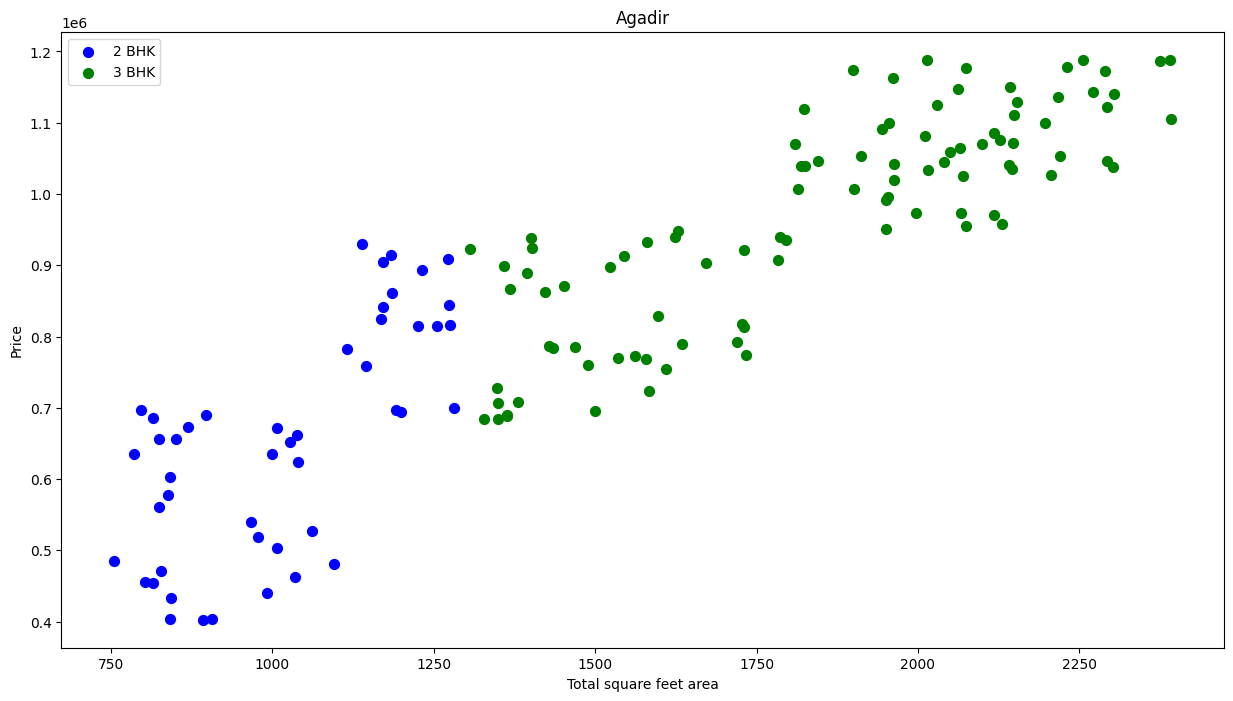

In [169]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,8)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Agadir")

## Removing `bhk` outlier values

In [170]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft<(stats['mean'])) & (bhk_df.price_per_sqft>(stats['mean'] - stats['std']))].index.values)
    return df.drop(exclude_indices,axis='index')

In [171]:
df7 = remove_bhk_outliers(df6)
df7.shape
df7

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Agadir,1,1123,1.0,766352,682.414960
1,Agadir,4,1900,2.0,1174350,618.078947
2,Agadir,4,1502,2.0,839289,558.780959
3,Agadir,1,1104,2.0,735660,666.358696
4,Agadir,5,3061,3.0,1797239,587.141130
...,...,...,...,...,...,...
6025,other,4,2094,2.0,1091093,521.056829
6026,other,2,877,2.0,567807,647.442417
6027,other,5,3436,3.0,1849113,538.158615
6028,other,5,2571,3.0,1238178,481.593932


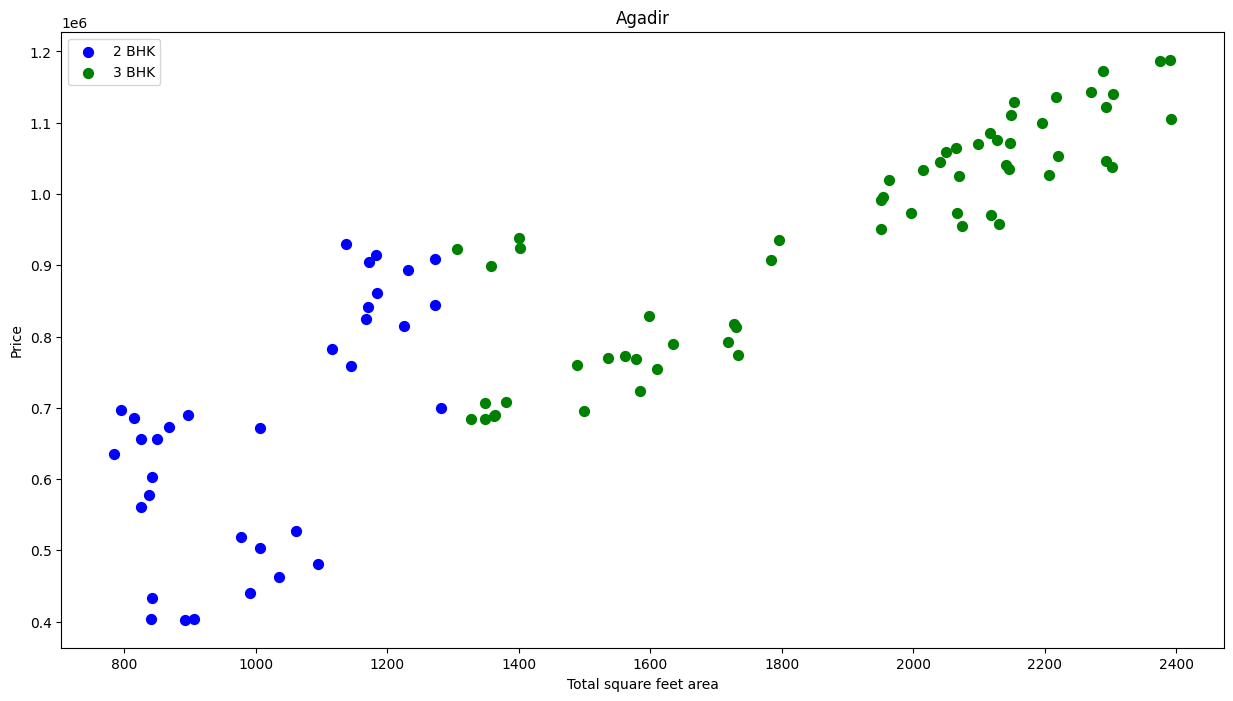

In [172]:
plot_scatter_chart(df7,"Agadir")

## Plotting `price_per_sqft` vs `count` histogram

Text(0, 0.5, 'Count')

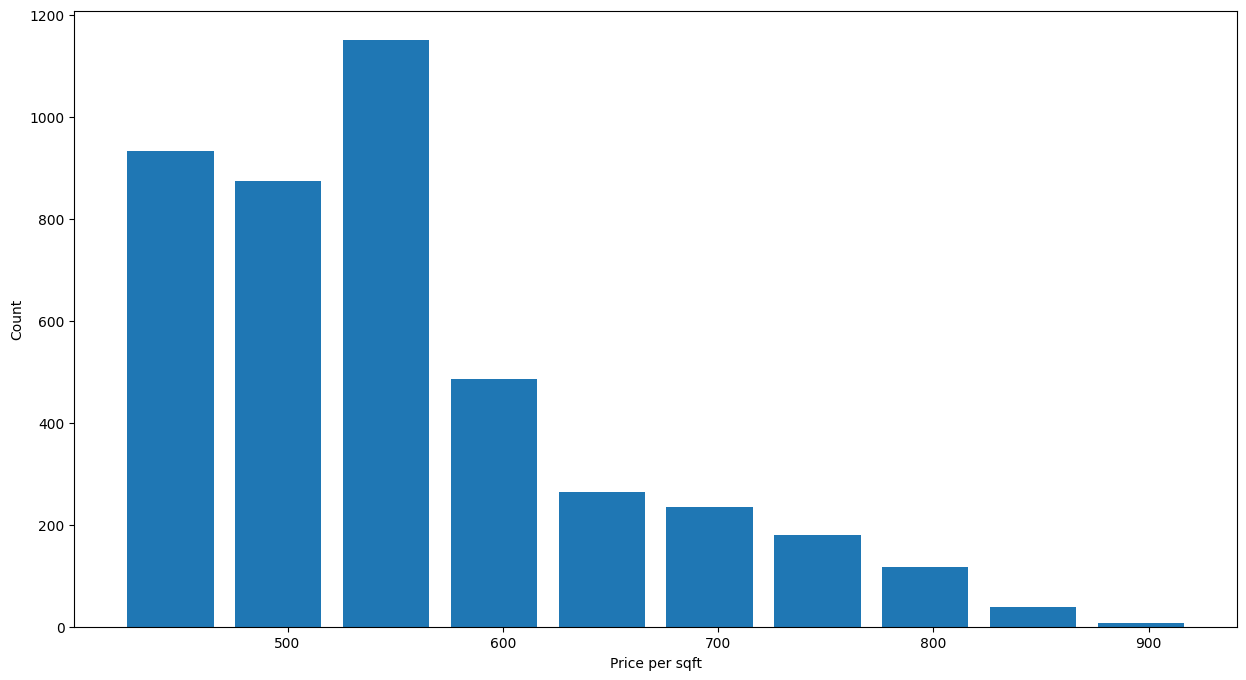

In [173]:
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

## Checking & removing irregular bathroom counts

In [174]:
# df7 = df6.copy()

df7.bath.unique()

array([1., 2., 3., 4.])

In [175]:
df7[df7.bath>4]

,location,bhk,total_sqft,bath,price,price_per_sqft


Text(0, 0.5, 'Count')

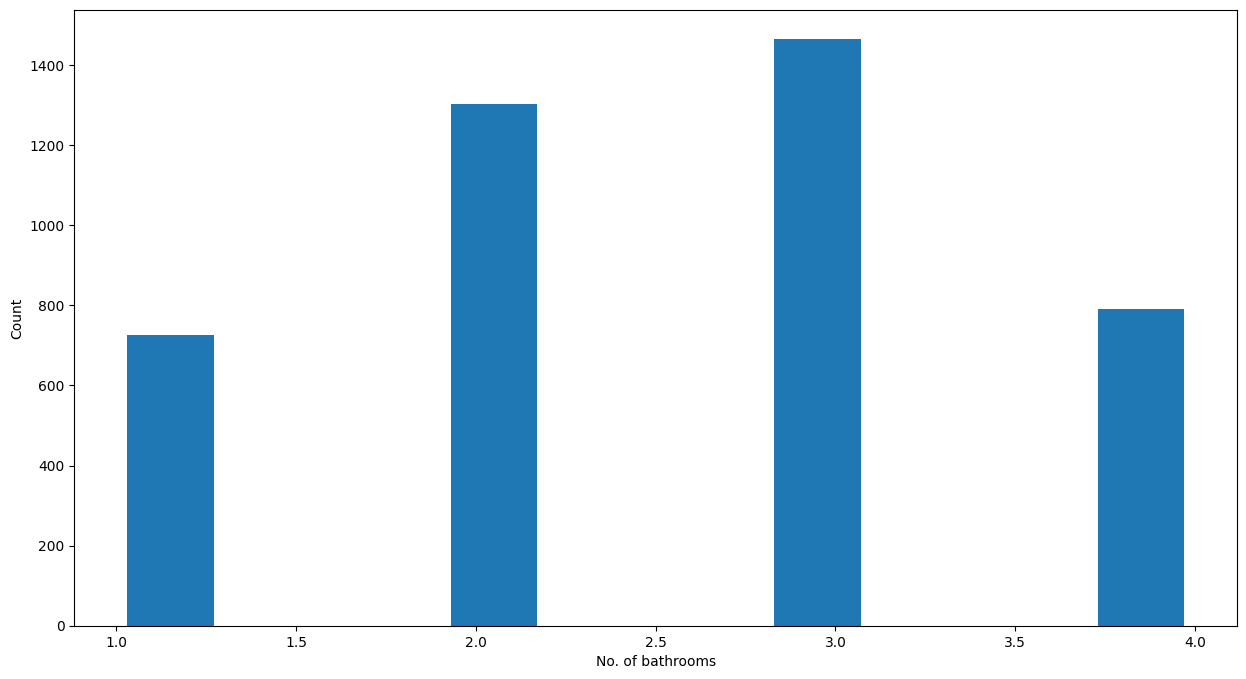

In [176]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")

In [177]:
df7[df7.bath>df7.bhk+2]

,location,bhk,total_sqft,bath,price,price_per_sqft


In [178]:
df8 = df7[df7.bath<df7.bhk+2]
df8

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Agadir,1,1123,1.0,766352,682.414960
1,Agadir,4,1900,2.0,1174350,618.078947
2,Agadir,4,1502,2.0,839289,558.780959
3,Agadir,1,1104,2.0,735660,666.358696
4,Agadir,5,3061,3.0,1797239,587.141130
...,...,...,...,...,...,...
6025,other,4,2094,2.0,1091093,521.056829
6026,other,2,877,2.0,567807,647.442417
6027,other,5,3436,3.0,1849113,538.158615
6028,other,5,2571,3.0,1238178,481.593932


## Dataset preparation for Model building: By final removal of engineered columns

In [179]:
df9 = df8.drop(['price_per_sqft'],axis='columns')
df9.head()

,location,bhk,total_sqft,bath,price
0,Agadir,1,1123,1.0,766352
1,Agadir,4,1900,2.0,1174350
2,Agadir,4,1502,2.0,839289
3,Agadir,1,1104,2.0,735660
4,Agadir,5,3061,3.0,1797239


In [180]:
dum = pd.get_dummies(df9.location)
dum

,Agadir,Azilal,Azrou,Beni Mellal,Berrched,Bjaad,Casablanca,Dakhla,EL Jadida,Essaouira,...,Ourzazat,Safi,Settat,Sidi ifni,Tanger,Tata,Taza,Tetouan,Zagoura,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [181]:

df10 = pd.concat([df9,dum.drop('other',axis='columns')],axis='columns')
df11 = df10.drop('location',axis=1)
df11

,bhk,total_sqft,bath,price,Agadir,Azilal,Azrou,Beni Mellal,Berrched,Bjaad,...,Oujda,Ourzazat,Safi,Settat,Sidi ifni,Tanger,Tata,Taza,Tetouan,Zagoura
0,1,1123,1.0,766352,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,1900,2.0,1174350,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,1502,2.0,839289,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1104,2.0,735660,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3061,3.0,1797239,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,4,2094,2.0,1091093,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6026,2,877,2.0,567807,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6027,5,3436,3.0,1849113,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6028,5,2571,3.0,1238178,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Determining X data & y target

In [182]:
X = df11.drop('price',axis=1)
y = df11.price
X.head()

,bhk,total_sqft,bath,Agadir,Azilal,Azrou,Beni Mellal,Berrched,Bjaad,Casablanca,...,Oujda,Ourzazat,Safi,Settat,Sidi ifni,Tanger,Tata,Taza,Tetouan,Zagoura
0,1,1123,1.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,1900,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,1502,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1104,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3061,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [183]:
y.head() #price

0     766352
1    1174350
2     839289
3     735660
4    1797239
Name: price, dtype: int64

## Splitting data for training and testing

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## Linear Prediction model

In [185]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)


0.8874851806453454

In [186]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89494803, 0.89085166, 0.89840955, 0.8860012 , 0.89465322])

## Best model with best parameters finding function

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [188]:
def find_best_model_by_gcv(X,y):
    ml_algos = {
        'lin_reg':{
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'dec_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name, config in ml_algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [189]:
find_best_model_by_gcv(X.values,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

######## performed a grid search with different models (lin_reg, lasso, dec_tree) and found the best hyperparameters for each model. Here's a summary of the results:

##### For linear regression (lin_reg), the best score was achieved when normalize was set to False.

##### For Lasso regression (lasso), the best score was achieved with an alpha value of 1 and 'selection': 'cyclic'.

##### For Decision Tree regression (dec_tree), the best score was achieved with specific hyperparameters such as 'criterion': 'friedman_mse' and 'splitter': 'random'.

##### These results provide insights into the hyperparameter settings that optimize the performance of each model according to the specified scoring metric.


## Price prediction function

In [190]:
X.columns

Index(['bhk', 'total_sqft', 'bath', 'Agadir', 'Azilal', 'Azrou', 'Beni Mellal',
       'Berrched', 'Bjaad', 'Casablanca', 'Dakhla', 'EL Jadida', 'Essaouira',
       'Essmara', 'Fes', 'Gulmim', 'Ifran', 'Kentitra', 'Khounifra',
       'Khouribga', 'Laayoun', 'Lhajb', 'Marrakech', 'Meknes', 'Mohammadia',
       'Nador', 'Oujda', 'Ourzazat', 'Safi', 'Settat', 'Sidi ifni', 'Tanger',
       'Tata', 'Taza', 'Tetouan', 'Zagoura'],
      dtype='object')

In [191]:
def predict_price(location,sqft,bath,bhk):
    try:
        loc_index = np.where(X.columns==location)[0][0]
    except:
        loc_index = 0
    x = np.zeros(len(X.columns))
    print(x)
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index > 0:
        x[loc_index] = 1
    print(x)
    print(lrm.predict([x]))
    return lrm.predict([x])[0]

## Evaluating Model Prediction

In [192]:
predict_price('Agadir',1000,2,2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1000.    2.    2.    1.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
[2887541.08046495]


C:\Users\abdes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\abdes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2887541.0804649475

In [193]:
predict_price('Casablanca',1000,3,3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1000.    3.    3.    0.    0.    0.    0.    0.    0.    1.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
[2879471.4154734]


C:\Users\abdes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\abdes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2879471.4154733955

In [194]:
predict_price('any other area',1000,3,3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1000.    3.    3.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
[2840229.87042276]


C:\Users\abdes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\abdes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2840229.870422758

## Pickle file creation of Prediction Model

In [195]:
import pickle
with open('5abd_sana_model.pickle','wb') as f:
    pickle.dump(lrm,f)

## Exporting the dataset columns to a json file

In [196]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("5columns_ma.json","w") as f:
    f.write(json.dumps(columns))